<font size = 5> NBA Data Science and Analysis</font>
<p>The ideia of this work is to <strong> scrape </strong> the NBA All Time Data, then find the list of players nominated for the Hall of Fame, build a <strong> Machine Learning Model </strong> to predict weather or not the active players will be nominated for the Hall of Fame.</p>
<p>To finish this work, there is a <strong> Data Analysis </strong> part where we see whats diferentiates a 'normal player' to a 'hall of famer'.</p>
 

<font size = 4><strong> 1. Web Scrapping </strong></font>

In [1]:
import warnings
import pandas as pd
import numpy as np
import requests


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
url = 'https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Regular%20Season&StatCategory=PTS'

In [2]:
headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

In [3]:
r = requests.get(url,headers = headers).json()

In [4]:
table_headers = r['resultSet']['headers']

In [5]:
table = r['resultSet']['rowSet']

In [6]:
df_allTime = pd.DataFrame(table, columns = table_headers)
df_allTime

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0          2544         LeBron James  1492  56596.0  14837  29313   0.506   
1         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
...         ...                  ...   ...      ...    ...    ...     ...   
4893      78470      Stan Washington     1      4.0      0      1   0.000   
4894     204033           David Wear     2      7.0      0      2   0.000   
4895     203091          Royce White     3      9.0      0      1   0.000   
4896     204222     Greg Whittington     4     12.0      0      3   0.000   
4897       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
0     2410.0  6926.0    0.348  8390  11404   0.736  1727.0   9458.0  11185.0   
1        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4893     NaN     NaN      NaN     0      0   0.000     0.0      0.0      0.0   
4894     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4895     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4896     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4897     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

        AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     11009  2275.0  1111.0  5211.0  2682  40474    2.113    0.437    0.547   
1      5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
2      5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3      6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4      5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
...     ...     ...     ...     ...   ...    ...      ...      ...      ...   
4893      0     0.0     0.0     NaN     1      0      NaN      NaN    0.000   
4894      1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4895      0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4896      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4897      0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.589        6         2         2         1          498          8   
1      0.592        2         1         1         2          179       2422   
2      0.577        7         3         3         3          396       1044   
3      0.550       15         8         6         4         1717         25   
4      0.569      103        30         5         5          672        364   
...      ...      ...       ...       ...       ...          ...        ...   
4893   0.000     4820      4495      4779      4821         4779       3614   
4894   0.000     4738      4456      4779      4788         4779       2683   
4895   0.000     4671      4433      4779      4821         4779       2683   
4896   0.000     4587      4390      4779      4739         4779       2683   
4897   0.000     4820      4482      4779      4869         4779       2683   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0             5           837         3         3         2135        160   
1          2144          2660        13         8         2337      

In [7]:
url2 = 'https://stats.nba.com/stats/leagueLeaders?ActiveFlag=Yes&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Regular%20Season&StatCategory=PTS'
r2 = requests.get(url2, headers = headers).json()
table_head2 = r2['resultSet']['headers']
table2 = r2['resultSet']['rowSet']

df_active = pd.DataFrame(table2, columns = table_head2)
mask = df_allTime['PLAYER_NAME'].isin(df_active['PLAYER_NAME'])
df_active = df_allTime[mask]
df_active

PLAYER_ID        PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0          2544       LeBron James  1492  56596.0  14837  29313   0.506   
7        201142       Kevin Durant  1061  38972.0   9950  19875   0.501   
19       201935       James Harden  1072  37222.0   7643  17315   0.441   
23       201566  Russell Westbrook  1162  39080.0   9055  20659   0.438   
29       201939      Stephen Curry   956  32725.0   8084  17098   0.473   
...         ...                ...   ...      ...    ...    ...     ...   
4822    1630608    Malcolm Cazalon     1      3.0      0      0   0.000   
4826    1630622     Jalen Crutcher     1      3.0      0      1   0.000   
4834    1641847        Andrew Funk     5     13.0      0      4   0.000   
4837    1629232       Kaiser Gates     1      7.0      0      4   0.000   
4886    1631376  Dmytro Skapintsev     2      2.0      0      1   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB    DREB      REB  \
0     2410.0  6926.0    0.348  8390  11404   0.736  1727.0  9458.0  11185.0   
7     2031.0  5248.0    0.387  6993   7910   0.884   717.0  6737.0   7454.0   
19    2940.0  8082.0    0.364  7659   8900   0.861   816.0  5201.0   6017.0   
23    1273.0  4186.0    0.304  5828   7512   0.776  1872.0  6435.0   8307.0   
29    3747.0  8805.0    0.426  3753   4125   0.910   629.0  3880.0   4509.0   
...      ...     ...      ...   ...    ...     ...     ...     ...      ...   
4822     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   
4826     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   
4834     0.0     3.0    0.000     0      0   0.000     0.0     0.0      0.0   
4837     0.0     2.0    0.000     0      0   0.000     0.0     1.0      1.0   
4886     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   

        AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     11009  2275.0  1111.0  5211.0  2682  40474    2.113    0.437    0.547   
7      4645  1124.0  1196.0  3364.0  2033  28924    1.381    0.334    0.552   
19     7629  1597.0   600.0  3919.0  2695  25885    1.947    0.408    0.526   
23     9468  1849.0   369.0  4587.0  2969  25211    2.064    0.403    0.469   
29     6119  1473.0   235.0  2987.0  2215  23668    2.049    0.493    0.582   
...     ...     ...     ...     ...   ...    ...      ...      ...      ...   
4822      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4826      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4834      0     1.0     1.0     0.0     0      0    0.000    0.000    0.000   
4837      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4886      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.589        6         2         2         1          498          8   
7      0.619      110        45        17        20          561         15   
19     0.610      103        60        52        37         1905          3   
23     0.526       59        43        23        16         1998         77   
29     0.626      201       114        40        38         1056          1   
...      ...      ...       ...       ...       ...          ...        ...   
4822   0.000     4820      4512      4779      4869         4779       2683   
4826   0.000     4820      4512      4779      4821         4779       2683   
4834   0.000     4530      4378      4779      4696         4779       2683   
4837   0.000     4820      4456      4779      4696         4779       2683   
4886   0.000     4738      4529      4779      4821         4779       2683   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0             5           837         3         3         2135        160   
7            19           267        10        23          212        603   
19            2           5

In [8]:
mask1 = ~df_allTime['PLAYER_NAME'].isin(df_active['PLAYER_NAME'])
df_retired = df_allTime[mask1]
df_retired

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
1         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
5          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4893      78470      Stan Washington     1      4.0      0      1   0.000   
4894     204033           David Wear     2      7.0      0      2   0.000   
4895     203091          Royce White     3      9.0      0      1   0.000   
4896     204222     Greg Whittington     4     12.0      0      3   0.000   
4897       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
1        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
5     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4893     NaN     NaN      NaN     0      0   0.000     0.0      0.0      0.0   
4894     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4895     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4896     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4897     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
1     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
2     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
5     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4893     0     0.0     0.0     NaN     1      0      NaN      NaN    0.000   
4894     1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4895     0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4896     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4897     0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
1      0.592        2         1         1         2          179       2422   
2      0.577        7         3         3         3          396       1044   
3      0.550       15         8         6         4         1717         25   
4      0.569      103        30         5         5          672        364   
5      0.577        4         4         8         8         1103         18   
...      ...      ...       ...       ...       ...          ...        ...   
4893   0.000     4820      4495      4779      4821         4779       3614   
4894   0.000     4738      4456      4779      4788         4779       2683   
4895   0.000     4671      4433      4779      4821         4779       2683   
4896   0.000     4587      4390      4779      4739         4779       2683   
4897   0.000     4820      4482      4779      4869         4779       2683   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
1          2144          2660        13         8         2337         32   
2           995          1767         1         1         2014         14   
3  

In [9]:
from bs4 import BeautifulSoup

url_HOF = 'https://www.nba.com/news/basketball-hall-of-fame-all-time'
html_text = requests.get(url_HOF).text
soup = BeautifulSoup(html_text,'lxml')
num_articles = 6
table = soup.find_all('li' , class_ = None)[:-num_articles]
nominees = []
motives = []
for i in range(len(table)):
    nominee , motive = table[i].text.replace('\xa0','').replace(', ',',').split(',')
    nominees.append(nominee)
    motives.append(motive)

dict_HOF = {'Nominees' : nominees,
            'Motive' : motives}

df_HOF = pd.DataFrame(dict_HOF) 
df_HOF

Nominees                           Motive
0     Seimone Augustus                           Player
1         Dick Barnett                           Player
2     Chauncey Billups                           Player
3         Vince Carter                           Player
4         Doug Collins  Contributor – Coach/Broadcaster
..                 ...                              ...
461     James Naismith                      Contributor
462       Harold Olsen                      Contributor
463      John Schommer                           Player
464  Amos Alonzo Stagg                      Contributor
465       Oswald Tower                      Contributor

[466 rows x 2 columns]

<font size = 3>Having the data about the <strong>Hall of Famers</strong>, we can add this to our dataframe, and add three other columns, <strong>Points per Game</strong>, <strong>Assists per Game</strong> and <strong>Rebounds per Game</strong>. </font>

In [10]:
df_retired.loc[:,'PPG'] = round(df_retired.loc[:,'PTS']/df_retired.loc[:,'GP'],2)
df_retired.loc[:,'APG'] = round(df_retired.loc[:,'AST']/df_retired.loc[:,'GP'],2)
df_retired.loc[:,'RPG'] = round(df_retired.loc[:,'REB']/df_retired.loc[:,'GP'],2)

df_retired['HOF'] = df_retired['PLAYER_NAME'].isin(df_HOF['Nominees'])
dict_yesNo = {True : 'Yes' , False : 'No'}

df_retired['HOF'] = df_retired['HOF'].apply(lambda x:dict_yesNo[x])

df_retired

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
1         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
5          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4893      78470      Stan Washington     1      4.0      0      1   0.000   
4894     204033           David Wear     2      7.0      0      2   0.000   
4895     203091          Royce White     3      9.0      0      1   0.000   
4896     204222     Greg Whittington     4     12.0      0      3   0.000   
4897       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
1        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
5     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4893     NaN     NaN      NaN     0      0   0.000     0.0      0.0      0.0   
4894     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4895     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4896     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4897     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
1     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
2     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
5     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4893     0     0.0     0.0     NaN     1      0      NaN      NaN    0.000   
4894     1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4895     0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4896     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4897     0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
1      0.592        2         1         1         2          179       2422   
2      0.577        7         3         3         3          396       1044   
3      0.550       15         8         6         4         1717         25   
4      0.569      103        30         5         5          672        364   
5      0.577        4         4         8         8         1103         18   
...      ...      ...       ...       ...       ...          ...        ...   
4893   0.000     4820      4495      4779      4821         4779       3614   
4894   0.000     4738      4456      4779      4788         4779       2683   
4895   0.000     4671      4433      4779      4821         4779       2683   
4896   0.000     4587      4390      4779      4739         4779       2683   
4897   0.000     4820      4482      4779      4869         4779       2683   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
1          2144          2660        13         8         2337         32   
2           995          1767         1         1         2014         14   
3  

<p></p>
<font size = 4><strong>2. Building a Machine Learning Model</strong></font>
<p></p>

<p></p>
<font size = 2><strong>2.1 Data Cleaning</strong></font>
<p></p>

In [11]:
to_duplicate = df_retired.loc[df_retired['HOF'] == 'Yes']
i = 0
while i <= 4:
    df_retired_ = pd.concat([df_retired,to_duplicate])
    i += 1
df_retired_
df_train = df_retired.drop(columns = ['GP_RANK','MIN_RANK','FGM_RANK','FGA_RANK','FG_PCT_RANK','FG3M_RANK',
                                      'FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
                                      'DREB_RANK','REB_RANK','AST_RANK','STL_RANK','BLK_RANK','TOV_RANK','PF_RANK',
                                      'PTS_RANK','AST_TOV_RANK','STL_TOV_RANK','EFG_PCT1','TS_PCT1',])

In [12]:
#Author: Dennis Trimarchi
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df_train

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
1         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
5          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4893      78470      Stan Washington     1      4.0      0      1   0.000   
4894     204033           David Wear     2      7.0      0      2   0.000   
4895     203091          Royce White     3      9.0      0      1   0.000   
4896     204222     Greg Whittington     4     12.0      0      3   0.000   
4897       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
1        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
5     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4893     NaN     NaN      NaN     0      0   0.000     0.0      0.0      0.0   
4894     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4895     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4896     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4897     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
1     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
2     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
5     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4893     0     0.0     0.0     NaN     1      0      NaN      NaN    0.000   
4894     1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4895     0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4896     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4897     0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT    PPG   APG    RPG  HOF  
1      0.592  24.61  3.63  11.18  Yes  
2      0.577  25.02  3.56  10.14  Yes  
3      0.550  24.99  4.68   5.24  Yes  
4      0.569  30.12  5.25   6.22  Yes  
5      0.577  20.74  2.40   7.55  Yes  
...      ...    ...   ...    ...  ...  
4893   0.000   0.00  0.00   0.00   No  
4894   0.000   0.00  0.50   1.00   No  
4895   0.000   0.00  0.00   0.00   No  
4896   0.000   0.00  0.00   0.00   No  
4897   0.000   0.00  0.00   3.00   No  

[4298 rows x 30 columns]

In [14]:
x = df_train.iloc[:,2:-1]
y = df_train.iloc[:,-1]
x

GP      MIN    FGM    FGA  FG_PCT    FG3M    FG3A  FG3_PCT   FTM  \
1     1560  57446.0  15837  28307   0.559     1.0    18.0    0.056  6712   
2     1476  54852.0  13528  26210   0.516    85.0   310.0    0.274  9787   
3     1346  48643.0  11719  26200   0.447  1827.0  5546.0    0.329  8378   
4     1072  41010.0  12192  24537   0.497   581.0  1778.0    0.327  7327   
5     1522  51367.0  11169  23734   0.471  1982.0  5210.0    0.380  7240   
...    ...      ...    ...    ...     ...     ...     ...      ...   ...   
4893     1      4.0      0      1   0.000     NaN     NaN      NaN     0   
4894     2      7.0      0      2   0.000     0.0     1.0    0.000     0   
4895     3      9.0      0      1   0.000     0.0     0.0    0.000     0   
4896     4     12.0      0      3   0.000     0.0     2.0    0.000     0   
4897     1      5.0      0      0   0.000     0.0     0.0    0.000     0   

        FTA  FT_PCT    OREB     DREB      REB   AST     STL     BLK     TOV  \
1      9304   0.721  2975.0   9394.0  17440.0  5660  1160.0  3189.0  2527.0   
2     13188   0.742  3562.0  11406.0  14968.0  5248  2085.0  1145.0  4524.0   
3     10011   0.837  1499.0   5548.0   7047.0  6306  1944.0   640.0  4010.0   
4      8772   0.835  1668.0   5004.0   6672.0  5633  2514.0   893.0  2924.0   
5      8239   0.879  1468.0  10021.0  11489.0  3651  1210.0  1281.0  2494.0   
...     ...     ...     ...      ...      ...   ...     ...     ...     ...   
4893      0   0.000     0.0      0.0      0.0     0     0.0     0.0     NaN   
4894      0   0.000     2.0      0.0      2.0     1     0.0     0.0     0.0   
4895      0   0.000     0.0      0.0      0.0     0     0.0     0.0     0.0   
4896      0   0.000     0.0      0.0      0.0     0     0.0     0.0     0.0   
4897      0   0.000     1.0      2.0      3.0     0     0.0     0.0     0.0   

        PF    PTS  AST_TOV  STL_TOV  EFG_PCT  TS_PCT    PPG   APG    RPG  
1     4657  38387    1.156    0.302    0.559   0.592  24.61  3.63  11.18  
2     4578  36928    1.160    0.461    0.518   0.577  25.02  3.56  10.14  
3     3353  33643    1.573    0.485    0.482   0.550  24.99  4.68   5.24  
4     2783  32292    1.926    0.860    0.509   0.569  30.12  5.25   6.22  
5     3601  31560    1.464    0.485    0.512   0.577  20.74  2.40   7.55  
...    ...    ...      ...      ...      ...     ...    ...   ...    ...  
4893     1      0      NaN      NaN    0.000   0.000   0.00  0.00   0.00  
4894     1      0    0.000    0.000    0.000   0.000   0.00  0.50   1.00  
4895     2      0    0.000    0.000    0.000   0.000   0.00  0.00   0.00  
4896     0      0    0.000    0.000    0.000   0.000   0.00  0.00   0.00  
4897     5      0    0.000    0.000    0.000   0.000   0.00  0.00   3.00  

[4298 rows x 27 columns]

In [15]:
sns.set(font_scale = 5)
fig, ax = plt.subplots(figsize = (100,100))
sns.heatmap(x.corr(),annot=True)

<Axes: >

<font size = 3> Removing correlated columns </font>

In [16]:
x = x.drop(columns = ['GP','MIN','FGA','FG3A','FTA','OREB','DREB'])
fig, ax = plt.subplots(figsize = (100,100))
sns.heatmap(x.corr(),annot=True)

<Axes: >

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
x_train.info()

num_vars = [i for i in x.columns if x.dtypes[i] == 'int64' or x.dtypes[i] == 'float64']

<class 'pandas.core.frame.DataFrame'>
Index: 3438 entries, 1576 to 1120
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FGM      3438 non-null   int64  
 1   FG_PCT   3438 non-null   float64
 2   FG3M     2415 non-null   float64
 3   FG3_PCT  2415 non-null   float64
 4   FTM      3438 non-null   int64  
 5   FT_PCT   3438 non-null   float64
 6   REB      3265 non-null   float64
 7   AST      3438 non-null   int64  
 8   STL      2664 non-null   float64
 9   BLK      2664 non-null   float64
 10  TOV      2500 non-null   float64
 11  PF       3438 non-null   int64  
 12  PTS      3438 non-null   int64  
 13  AST_TOV  2500 non-null   float64
 14  STL_TOV  2500 non-null   float64
 15  EFG_PCT  3438 non-null   float64
 16  TS_PCT   3438 non-null   float64
 17  PPG      3438 non-null   float64
 18  APG      3438 non-null   float64
 19  RPG      3265 non-null   float64
dtypes: float64(15), int64(5)
memory usage: 564.0 KB


<p></p>
<font size = 3> Creating a <strong>Pipeline</strong> to avoid repeating code</font>
<p></p>

In [18]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
trans = Pipeline(steps = [('imputer' , SimpleImputer(strategy = 'constant' , fill_value = 0)),
                             ('scaler' , StandardScaler())])
prep = ColumnTransformer(transformers = [('num', trans, num_vars)])

<p></p>
<font size = 2><strong> 2.2 Selecting the Best Model</strong></font>
<p></p>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

dist_Param_rf = dict()
dist_Param_rf['n_estimators'] = [10,50,100,200]
dist_Param_rf['criterion'] = ['gini', 'entropy', 'log_loss']


rf_random_search = RandomizedSearchCV(rf_model,dist_Param_rf)

model_rf = Pipeline(steps = [('preprocessor', prep),
                            ('model', rf_random_search)])

In [21]:
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
model_rf['model'].best_params_
model_rf['model'].best_score_

0.9761484039132053

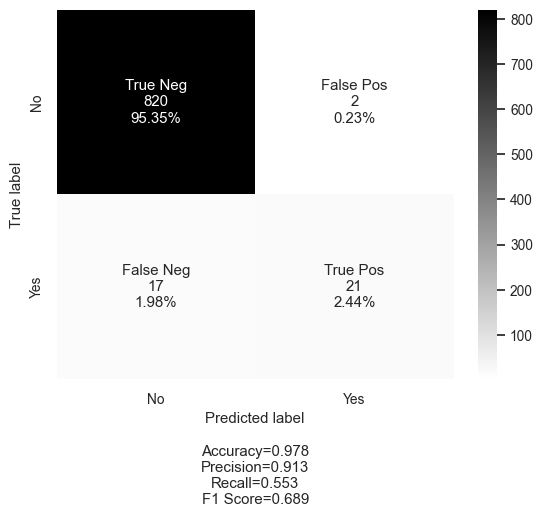

In [22]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale = 0.9)

cf_matrix = confusion_matrix(y_test, y_pred, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [23]:
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score, accuracy_score

dict_trans_income = {'No' : 0 , 'Yes' : 1}
y_test_bin = pd.Series(y_test).apply(lambda x : dict_trans_income[x])
y_pred_bin = pd.Series(y_pred).apply(lambda x : dict_trans_income[x])
df_dict_rf = {'Modelo' : ['Random Forest'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred_bin)],
             'F1' : [f1_score(y_test_bin,y_pred_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred_bin)]}
df_rf = pd.DataFrame(data = df_dict_rf)
df_rf

Modelo  Accuracy  Precision    Recall        F1       AUC
0  Random Forest  0.977907   0.913043  0.552632  0.688525  0.775099

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier()

params_GBC = {'loss' : ['log_loss','exponential'],
              'n_estimators' : [100,200,300],
             'criterion' : ['friedman_mse' , 'squared_error']}


GBC_random_search = RandomizedSearchCV(GBC_model,params_GBC)

model_GBC = Pipeline(steps = [('preprocessor', prep),
                            ('model', GBC_random_search)])

In [25]:
model_GBC.fit(x_train,y_train)
y_pred1 = model_GBC.predict(x_test)
model_GBC['model'].best_params_
model_GBC['model'].best_score_

0.9764395247283437

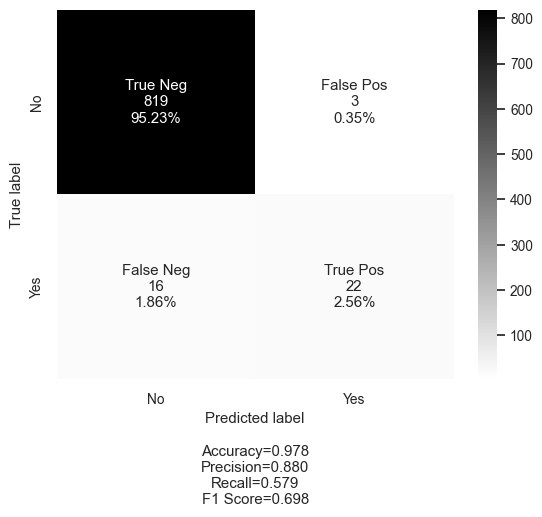

In [26]:
cf_matrix = confusion_matrix(y_test, y_pred1, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [27]:
y_test_bin = pd.Series(y_test).apply(lambda x : dict_trans_income[x])
y_pred_bin = pd.Series(y_pred1).apply(lambda x : dict_trans_income[x])
df_dict_GBC = {'Modelo' : ['Gradient Boosting'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred_bin)],
             'F1' : [f1_score(y_test_bin,y_pred_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred_bin)]}
df_GBC = pd.DataFrame(data = df_dict_GBC)
df_GBC

Modelo  Accuracy  Precision    Recall        F1       AUC
0  Gradient Boosting  0.977907       0.88  0.578947  0.698413  0.787649

In [28]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

Lg_model = LogisticRegression()

params_Lg = {'penalty' : ['l1', 'l2', 'elasticnet'],
             'solver' : ['lbfgs' , 'sag' , 'newton-cg'],
             'C' : loguniform(1e-5,100)}


Lg_random_search = RandomizedSearchCV(Lg_model,params_Lg)

model_Lg = Pipeline(steps = [('preprocessor', prep),
                            ('model', Lg_random_search)])

In [29]:
model_Lg.fit(x_train,y_train)
y_pred2 = model_Lg.predict(x_test)
model_Lg['model'].best_params_
model_Lg['model'].best_score_

0.9741118276293964

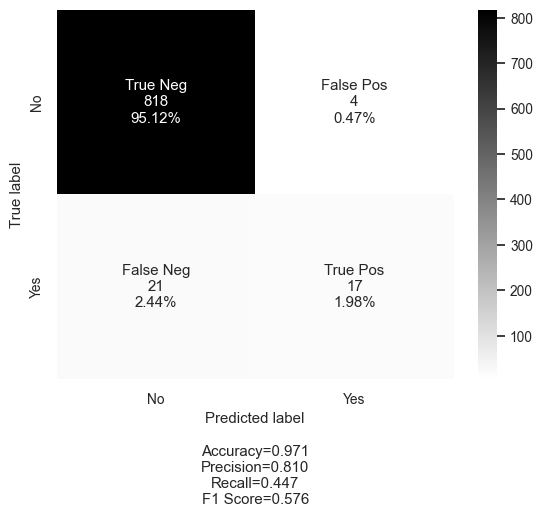

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred2, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [31]:
y_test_bin = pd.Series(y_test).apply(lambda x : dict_trans_income[x])
y_pred_bin = pd.Series(y_pred2).apply(lambda x : dict_trans_income[x])
df_dict_Lg = {'Modelo' : ['Logistic Regression'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred_bin)],
             'F1' : [f1_score(y_test_bin,y_pred_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred_bin)]}
df_Lg = pd.DataFrame(data = df_dict_Lg)
df_Lg

Modelo  Accuracy  Precision    Recall        F1       AUC
0  Logistic Regression   0.97093   0.809524  0.447368  0.576271  0.721251

In [32]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier()

params_mlp = {'hidden_layer_sizes' : [100],
              'activation' : [ 'logistic' , 'relu'],
              'solver' : ['lbfgs' , 'adam'],
             'max_iter' : [200]}

random_search_mlp = RandomizedSearchCV(MLP_model,params_mlp)

model_MLP = Pipeline(steps = [('preprocessing' , prep) , 
                             ('model' , random_search_mlp)])

In [33]:
model_MLP.fit(x_train,y_train)
y_pred3 = model_MLP.predict(x_test)
model_MLP['model'].best_params_
model_MLP['model'].best_score_

0.9726579161165837

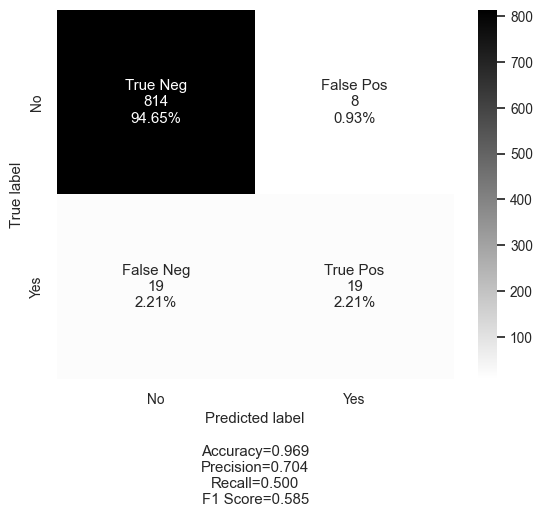

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred3, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [35]:
y_pred3_bin = pd.Series(y_pred3).apply(lambda x : dict_trans_income[x])
df_dict_MLP = {'Modelo' : ['Multi Layer Perceptron'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred3_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred3_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred3_bin)],
             'F1' : [f1_score(y_test_bin,y_pred3_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred3_bin)]}
df_MLP = pd.DataFrame(data = df_dict_MLP)
df_MLP

Modelo  Accuracy  Precision  Recall        F1       AUC
0  Multi Layer Perceptron  0.968605   0.703704     0.5  0.584615  0.745134

In [36]:
from sklearn.svm import SVC

Vector_model = SVC()

params_Vector = {'C' : loguniform(1e-5,100),
              'kernel' : [ 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'decision_function_shape' : ['ovo', 'ovr'],
             'cache_size' : [200,300,400,500]}

random_search_Vector = RandomizedSearchCV(Vector_model,params_Vector)

model_Vector = Pipeline(steps = [('preprocessing' , prep) , 
                             ('model' , random_search_Vector)])

In [37]:
model_MLP.fit(x_train,y_train)
y_pred4 = model_MLP.predict(x_test)
model_MLP['model'].best_params_
model_MLP['model'].best_score_

0.9738215530956975

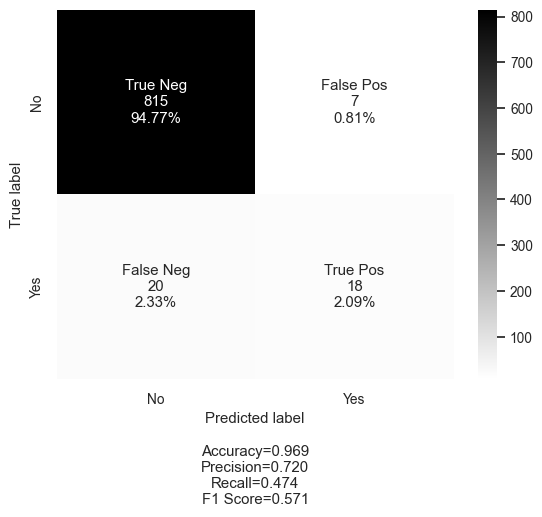

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred4, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [39]:
y_pred4_bin = pd.Series(y_pred4).apply(lambda x : dict_trans_income[x])
df_dict_Vector = {'Modelo' : ['Support Vector Machine Classifier'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred4_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred4_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred4_bin)],
             'F1' : [f1_score(y_test_bin,y_pred4_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred4_bin)]}
df_Vector = pd.DataFrame(data = df_dict_Vector)
df_Vector

Modelo  Accuracy  Precision    Recall        F1  \
0  Support Vector Machine Classifier  0.968605       0.72  0.473684  0.571429   

        AUC  
0  0.732584

In [40]:
df_models = pd.concat([df_rf,df_GBC,df_Lg,df_MLP,df_Vector])
df_models

Modelo  Accuracy  Precision    Recall        F1  \
0                      Random Forest  0.977907   0.913043  0.552632  0.688525   
0                  Gradient Boosting  0.977907   0.880000  0.578947  0.698413   
0                Logistic Regression  0.970930   0.809524  0.447368  0.576271   
0             Multi Layer Perceptron  0.968605   0.703704  0.500000  0.584615   
0  Support Vector Machine Classifier  0.968605   0.720000  0.473684  0.571429   

        AUC  
0  0.775099  
0  0.787649  
0  0.721251  
0  0.745134  
0  0.732584

<p></p>
<font size = 2> The <strong>Recall</strong> statistic in this case is super important, given that the amount of Hall of Famers is small compared to non Hall of Famers we have to prioritize the <strong>Recall</strong> without giving up the <strong>Accuracy</strong>, therefore the best model is the <strong>Gradient Boosting</strong>
<p></p>

In [47]:
model = model_GBC
model = model_GBC.fit(x,y)
model['model'].best_params_
model['model'].best_score_

0.7816111216395484

<p></p>
<font size = 2><strong>2.3 Predicting</strong></font>
<p></p>

In [48]:
df_active.loc[:,'PPG'] = round(df_active.loc[:,'PTS']/df_active.loc[:,'GP'],2)
df_active.loc[:,'APG'] = round(df_active.loc[:,'AST']/df_active.loc[:,'GP'],2)
df_active.loc[:,'RPG'] = round(df_active.loc[:,'REB']/df_active.loc[:,'GP'],2)


df_train_active = df_active.drop(columns = ['GP_RANK','MIN_RANK','FGM_RANK','FGA_RANK','FG_PCT_RANK','FG3M_RANK',
                                      'FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
                                      'DREB_RANK','REB_RANK','AST_RANK','STL_RANK','BLK_RANK','TOV_RANK','PF_RANK',
                                      'PTS_RANK','AST_TOV_RANK','STL_TOV_RANK','EFG_PCT1','TS_PCT1',])
x_active = df_train_active.iloc[:,2:]
x_active = x_active.drop(columns = ['GP','MIN','FGA','FG3A','FTA','OREB','DREB'])
final_pred = model.predict(x_active)
df_final = pd.DataFrame({'HOF' : final_pred})

df_active = df_active.assign(HOF=list(df_final['HOF']))
df_active

PLAYER_ID        PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0          2544       LeBron James  1492  56596.0  14837  29313   0.506   
7        201142       Kevin Durant  1061  38972.0   9950  19875   0.501   
19       201935       James Harden  1072  37222.0   7643  17315   0.441   
23       201566  Russell Westbrook  1162  39080.0   9055  20659   0.438   
29       201939      Stephen Curry   956  32725.0   8084  17098   0.473   
...         ...                ...   ...      ...    ...    ...     ...   
4822    1630608    Malcolm Cazalon     1      3.0      0      0   0.000   
4826    1630622     Jalen Crutcher     1      3.0      0      1   0.000   
4834    1641847        Andrew Funk     5     13.0      0      4   0.000   
4837    1629232       Kaiser Gates     1      7.0      0      4   0.000   
4886    1631376  Dmytro Skapintsev     2      2.0      0      1   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB    DREB      REB  \
0     2410.0  6926.0    0.348  8390  11404   0.736  1727.0  9458.0  11185.0   
7     2031.0  5248.0    0.387  6993   7910   0.884   717.0  6737.0   7454.0   
19    2940.0  8082.0    0.364  7659   8900   0.861   816.0  5201.0   6017.0   
23    1273.0  4186.0    0.304  5828   7512   0.776  1872.0  6435.0   8307.0   
29    3747.0  8805.0    0.426  3753   4125   0.910   629.0  3880.0   4509.0   
...      ...     ...      ...   ...    ...     ...     ...     ...      ...   
4822     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   
4826     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   
4834     0.0     3.0    0.000     0      0   0.000     0.0     0.0      0.0   
4837     0.0     2.0    0.000     0      0   0.000     0.0     1.0      1.0   
4886     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   

        AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     11009  2275.0  1111.0  5211.0  2682  40474    2.113    0.437    0.547   
7      4645  1124.0  1196.0  3364.0  2033  28924    1.381    0.334    0.552   
19     7629  1597.0   600.0  3919.0  2695  25885    1.947    0.408    0.526   
23     9468  1849.0   369.0  4587.0  2969  25211    2.064    0.403    0.469   
29     6119  1473.0   235.0  2987.0  2215  23668    2.049    0.493    0.582   
...     ...     ...     ...     ...   ...    ...      ...      ...      ...   
4822      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4826      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4834      0     1.0     1.0     0.0     0      0    0.000    0.000    0.000   
4837      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4886      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.589        6         2         2         1          498          8   
7      0.619      110        45        17        20          561         15   
19     0.610      103        60        52        37         1905          3   
23     0.526       59        43        23        16         1998         77   
29     0.626      201       114        40        38         1056          1   
...      ...      ...       ...       ...       ...          ...        ...   
4822   0.000     4820      4512      4779      4869         4779       2683   
4826   0.000     4820      4512      4779      4821         4779       2683   
4834   0.000     4530      4378      4779      4696         4779       2683   
4837   0.000     4820      4456      4779      4696         4779       2683   
4886   0.000     4738      4529      4779      4821         4779       2683   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0             5           837         3         3         2135        160   
7            19           267        10        23          212        603   
19            2           5

In [49]:
df_allTime_final = pd.concat([df_retired,df_active],ignore_index = True)
df_allTime_final

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
1           252          Karl Malone  1476  54852.0  13528  26210   0.516   
2           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
3           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
4          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4893    1630608      Malcolm Cazalon     1      3.0      0      0   0.000   
4894    1630622       Jalen Crutcher     1      3.0      0      1   0.000   
4895    1641847          Andrew Funk     5     13.0      0      4   0.000   
4896    1629232         Kaiser Gates     1      7.0      0      4   0.000   
4897    1631376    Dmytro Skapintsev     2      2.0      0      1   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
0        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
1       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
2     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
3      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
4     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4893     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4894     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4895     0.0     3.0    0.000     0      0   0.000     0.0      0.0      0.0   
4896     0.0     2.0    0.000     0      0   0.000     0.0      1.0      1.0   
4897     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
1     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
2     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
3     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
4     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4893     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4894     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4895     0     1.0     1.0     0.0     0      0    0.000    0.000    0.000   
4896     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4897     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.592        2         1         1         2          179       2422   
1      0.577        7         3         3         3          396       1044   
2      0.550       15         8         6         4         1717         25   
3      0.569      103        30         5         5          672        364   
4      0.577        4         4         8         8         1103         18   
...      ...      ...       ...       ...       ...          ...        ...   
4893   0.000     4820      4512      4779      4869         4779       2683   
4894   0.000     4820      4512      4779      4821         4779       2683   
4895   0.000     4530      4378      4779      4696         4779       2683   
4896   0.000     4820      4456      4779      4696         4779       2683   
4897   0.000     4738      4529      4779      4821         4779       2683   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0          2144          2660        13         8         2337         32   
1           995          1767         1         1         2014         14   
2  

In [50]:
df_allTime_final.to_csv('NBA_allTime_PredictHoF.csv')

<p></p>
<font size = 3><strong>Data Analysis</strong></font>
<p></p>

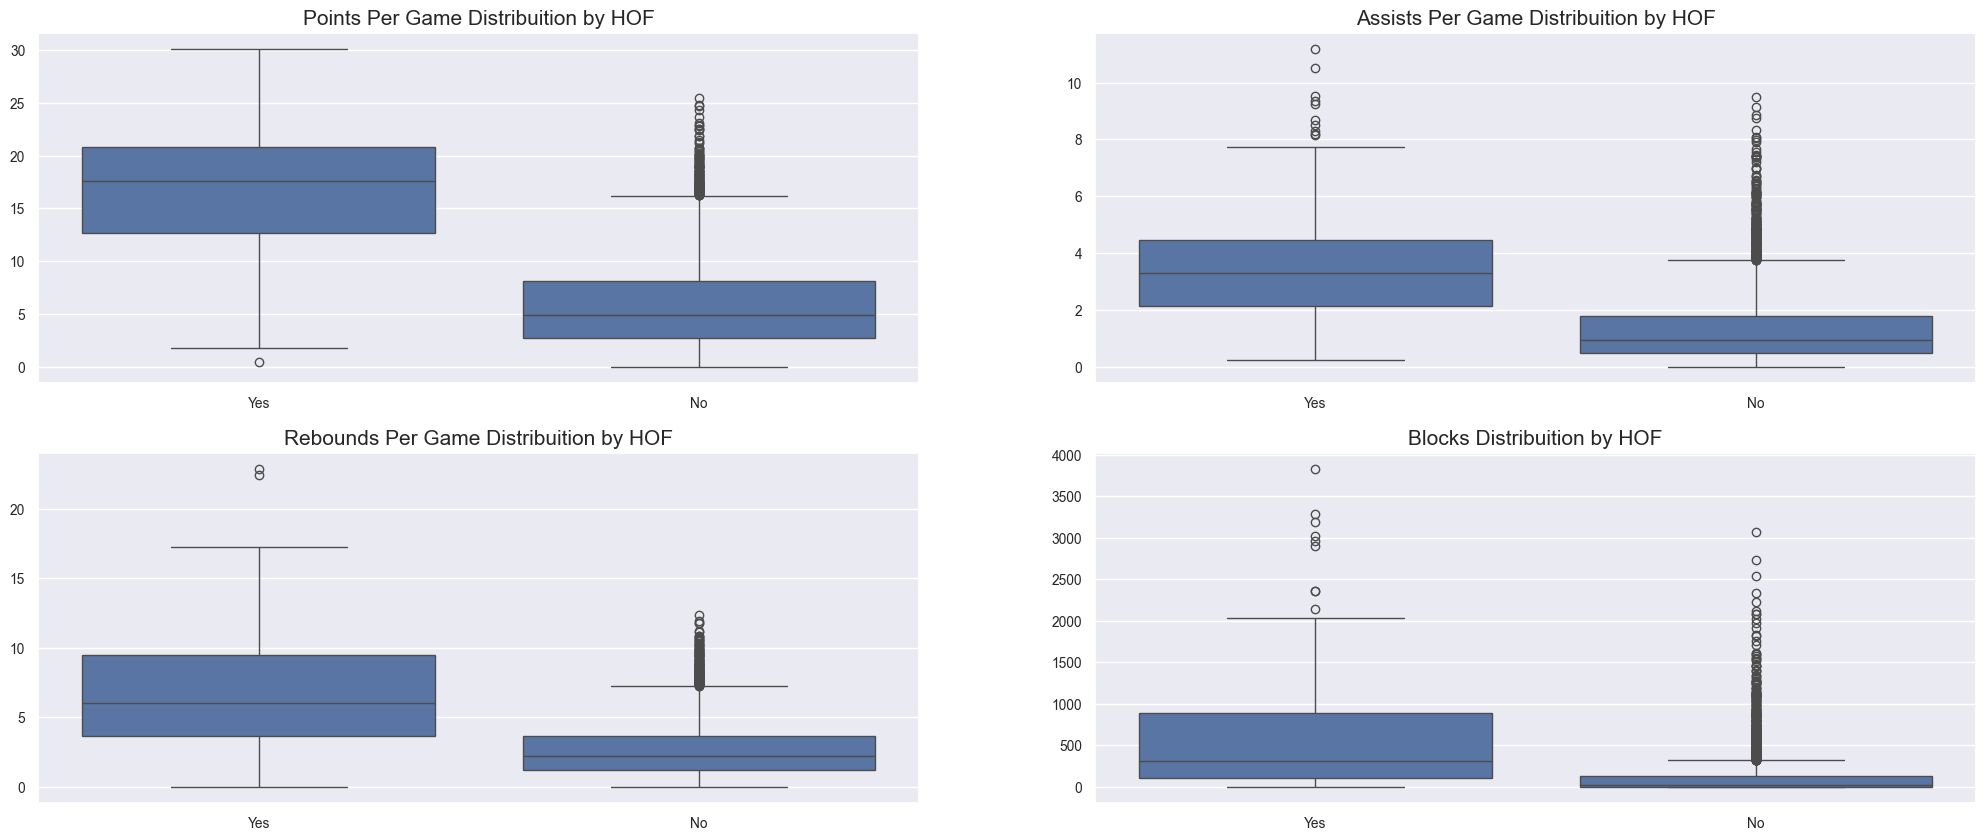

In [51]:
fig,axs = plt.subplots(2, 2,figsize = (25,10))
sns.set(font_scale = 1.2)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'PPG', ax = axs[0,0])
axs[0,0].set_title('Points Per Game Distribuition by HOF', fontsize = 15)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'APG', ax = axs[0,1])
axs[0,1].set_title('Assists Per Game Distribuition by HOF', fontsize = 15)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'RPG', ax = axs[1,0])
axs[1,0].set_title('Rebounds Per Game Distribuition by HOF', fontsize = 15)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'BLK', ax = axs[1,1])
axs[1,1].set_title('Blocks Distribuition by HOF', fontsize = 15)

for i in range(2):
    for j in range(2):
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

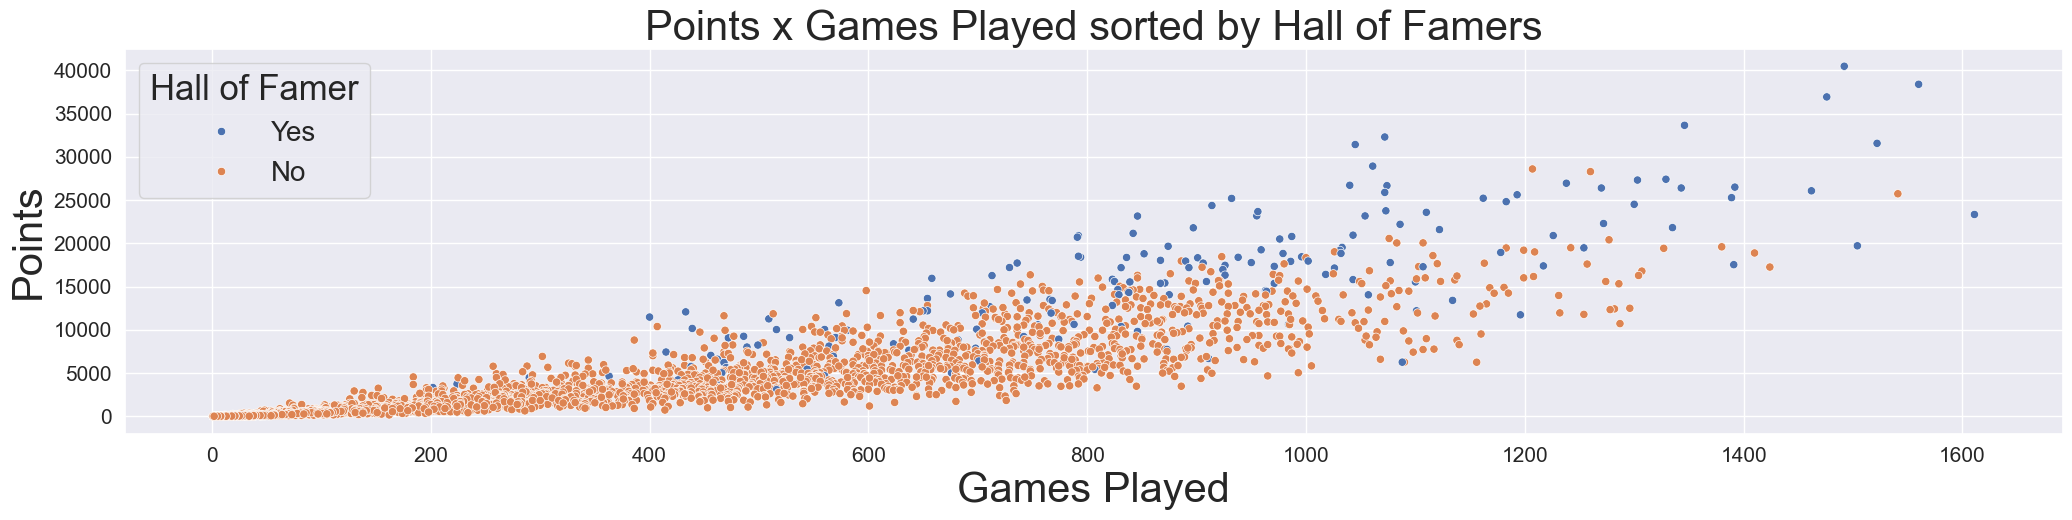

In [52]:
fig,ax = plt.subplots(figsize = (25,5))
sns.set(font_scale = 0.9)

sns.scatterplot(data=df_allTime_final, x = 'GP', y = 'PTS', hue = 'HOF')
ax.set_title('Points x Games Played sorted by Hall of Famers', fontsize = 30)
ax.set_ylabel('Points' , fontsize = 30)
ax.set_xlabel('Games Played' , fontsize = 30)
plt.gca().tick_params(axis='both', which='major', labelsize=15)
plt.legend(title = 'Hall of Famer', loc = 'upper left', title_fontsize=25,fontsize = 20)

<font size = 3> One thing that we can notice is that there are some missclassifications when some players classified as <em>Hall of Famers</em> average almost 5 points per game and some <em> normal </em> palyers have a high average.</font>

<font size = 3><p> But overall <strong> Hall of Famers</strong> follow what we expect, have greater statistics than <em> normal </em> players.</p></font>